Jake Toma

In [1]:
conda install -c conda-forge emoji

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
import string
import emoji
from datetime import timedelta

# Opening the tweets

In [3]:
with open("/Users/Jake/Downloads/doge_sample_100k.json") as f:
    dogesample = json.load(f)

In [4]:
dfdc = pd.DataFrame()

# Putting them into a dataframe

In [135]:
dfdc['full_text'] = [x['text'] for x in dogesample]
dfdc['author'] = [x['user']['screen_name'] for x in dogesample]
dfdc['retweetornot'] = [x['retweeted'] for x in dogesample]
dfdc['timestamp'] = [x['created_at'] for x in dogesample]
dfdc['timestamp'] = pd.to_datetime(dfdc['timestamp']) - timedelta(hours=6)
dfdc['dateoftweet'] = dfdc.timestamp.apply(lambda x:  str(x)[:10])
dfdc['dateoftweet'] = pd.to_datetime(dfdc.dateoftweet)

In [170]:
dfdc

,full_text,author,retweetornot,timestamp,dateoftweet,text_nolink,text_lower,text_clean,words,sentiment,date
0,hayallerim için dogecoin doge #doge #dogecoin #dogecointo1dollar #dogearmy #elon 2,infectiousmoda,False,2021-02-04 03:11:34+00:00,2021-02-04,hayallerim için dogecoin doge 2,hayallerim için dogecoin doge 2,hayallerim için dogecoin doge 2,"[2, hayallerim, için]",0.0000,2021-02-04
1,RT @4ngryDoge: Me watching my investment skyrocket when ever @elonmusk tweets about #dogecoin . . . https://t.co/3hYrQBIwI0,melodydabmore,False,2021-02-05 22:27:46+00:00,2021-02-05,RT : Me watching my investment skyrocket when ever tweets about . . .,rt : me watching my investment skyrocket when ever tweets about . . .,rt me watching my investment skyrocket when ever tweets about,"[tweets, watching, ever, rt, investment, skyrocket]",0.0000,2021-02-05
2,The only reason behind the $doge pump is a trading discord with 260.000 members. They just announced they are pumpi… https://t.co/tGr0JyjukO,Mpi_Ceee,False,2021-02-05 01:56:14+00:00,2021-02-05,The only reason behind the $doge pump is a trading discord with 260.000 members. They just announced they are pumpi…,the only reason behind the $doge pump is a trading discord with 260.000 members. they just announced they are pumpi…,the only reason behind the doge pump is a trading discord with 260000 members they just announced they are pumpi…,"[pump, behind, discord, trading, 260000, reason, announced, pumpi…, members]",-0.4019,2021-02-05
3,RT @closfranco: Those selling are going to regret it!!!!\n#dogecoin \n#DogecoinToTheMoon \n#dogecointo1dollar \n#dogearmy \n#traval \n#traval\n#El…,Alexia88788466,False,2021-02-02 10:38:17+00:00,2021-02-02,RT : Those selling are going to regret it!!!!\n \n \n \n \n \n\n…,rt : those selling are going to regret it!!!! …,rt those selling are going to regret it …,"[going, selling, …, rt, regret]",-0.4215,2021-02-02
4,@DOGEREVOLUTION1 @KingValhallaWSB #DogecoinToTheMoon #Dogecoin #dogecointoadollar,DOGECOINPAGE,False,2021-02-05 19:04:11+00:00,2021-02-05,,,,[],0.0000,2021-02-05
...,...,...,...,...,...,...,...,...,...,...,...
99995,RT @Dogecoinupdate: Told you to buy at the dip. 🤷🏽‍♂️ #Dogecoin,NashiusM,False,2021-02-06 19:11:11+00:00,2021-02-06,RT : Told you to buy at the dip. 🤷🏽‍♂️,rt : told you to buy at the dip. 🤷🏽‍♂️,rt told you to buy at the dip 🤷🏽‍♂️,"[🤷🏽‍♂️, buy, told, dip, rt]",0.0000,2021-02-06
99996,RT @LivingJiyu: Thank you @elonmusk! #Dogecoin is the crypto of the people! Invest now and hold!\n\n#DOGE #DogecoinToTheMoon #dogearmy #ElonD…,Dia_Sait,False,2021-02-04 04:53:26+00:00,2021-02-04,RT : Thank you ! is the crypto of the people! Invest now and hold!\n\n …,rt : thank you ! is the crypto of the people! invest now and hold! …,rt thank you is the crypto of the people invest now and hold …,"[hold, crypto, invest, thank, …, people, rt]",0.3612,2021-02-04
99997,"RT @ItsDogeCoin: ATTENTION ALL #DOGEARMY MEMBERS, \n\nReply with your best #doge memes🚀\n\n👇👇👇let’s see ‘em 👇👇👇",dankoweedburn,False,2021-02-05 11:38:28+00:00,2021-02-05,"RT : ATTENTION ALL MEMBERS, \n\nReply with your best memes🚀\n\n👇👇👇let’s see ‘em 👇👇👇","rt : attention all members, reply with your best memes🚀👇👇👇let’s see ‘em 👇👇👇",rt attention all members reply with your best memes🚀👇👇👇let’s see ‘em 👇👇👇,"[👇👇👇, reply, attention, best, see, memes🚀👇👇👇let’s, ‘em, rt, members]",0.6369,2021-02-05
99998,#dogecoin,jmork9,False,2021-02-07 17:39:10+00:00,2021-02-07,,,,[],0.0000,2021-02-07


# Creating clean text while making changes to full text

In [6]:
import re

In [7]:
find_links = re.compile(r'https\S+')
find_users = re.compile(r'@\w+')
find_hashtags = re.compile(r'#\w+')

dfdc['text_nolink']=[find_links.sub("",x) for x in dfdc['full_text']]
dfdc['text_nolink']=[find_users.sub("",x) for x in dfdc['text_nolink']]
dfdc['text_nolink']=[find_hashtags.sub("",x) for x in dfdc['text_nolink']]

import string
string.punctuation

remv_punc = str.maketrans('','',string.punctuation + '"' +"'"+'"')
dfdc['text_lower'] = dfdc['text_nolink'].str.lower().str.replace("\n","")
dfdc['text_clean'] = dfdc.text_lower.str.translate(remv_punc)

# Reporting top 10 common words, top 5 mentioned accounts, top 5 most rt'd, top 5 # besides 'doge' and 'dogecoin'

### Split into words

In [8]:
from nltk.corpus import stopwords

In [9]:
sw_list = stopwords.words('english') + ['amp',''," ","doge","dogecoin","coin"]

In [10]:
dfdc['words'] = [x.split(" ") for x in dfdc['text_clean']]

### Taking out stop words

In [11]:
dfdc['words'] = [list(set(x) - set(sw_list)) for x in dfdc['words']]

In [12]:
dfdc

,full_text,author,retweetornot,timestamp,dateoftweet,text_nolink,text_lower,text_clean,words
0,hayallerim için dogecoin doge #doge #dogecoin ...,infectiousmoda,False,2021-02-04 03:11:34+00:00,2021-02-04,hayallerim için dogecoin doge 2,hayallerim için dogecoin doge 2,hayallerim için dogecoin doge 2,"[2, hayallerim, için]"
1,RT @4ngryDoge: Me watching my investment skyro...,melodydabmore,False,2021-02-05 22:27:46+00:00,2021-02-05,RT : Me watching my investment skyrocket when ...,rt : me watching my investment skyrocket when ...,rt me watching my investment skyrocket when e...,"[tweets, watching, ever, rt, investment, skyro..."
2,The only reason behind the $doge pump is a tra...,Mpi_Ceee,False,2021-02-05 01:56:14+00:00,2021-02-05,The only reason behind the $doge pump is a tra...,the only reason behind the $doge pump is a tra...,the only reason behind the doge pump is a trad...,"[pump, behind, discord, trading, 260000, reaso..."
3,RT @closfranco: Those selling are going to reg...,Alexia88788466,False,2021-02-02 10:38:17+00:00,2021-02-02,RT : Those selling are going to regret it!!!!\...,rt : those selling are going to regret it!!!! ...,rt those selling are going to regret it …,"[going, selling, …, rt, regret]"
4,@DOGEREVOLUTION1 @KingValhallaWSB #DogecoinToT...,DOGECOINPAGE,False,2021-02-05 19:04:11+00:00,2021-02-05,,,,[]
...,...,...,...,...,...,...,...,...,...
99995,RT @Dogecoinupdate: Told you to buy at the dip...,NashiusM,False,2021-02-06 19:11:11+00:00,2021-02-06,RT : Told you to buy at the dip. 🤷🏽‍♂️,rt : told you to buy at the dip. 🤷🏽‍♂️,rt told you to buy at the dip 🤷🏽‍♂️,"[🤷🏽‍♂️, buy, told, dip, rt]"
99996,RT @LivingJiyu: Thank you @elonmusk! #Dogecoin...,Dia_Sait,False,2021-02-04 04:53:26+00:00,2021-02-04,RT : Thank you ! is the crypto of the people!...,rt : thank you ! is the crypto of the people!...,rt thank you is the crypto of the people in...,"[hold, crypto, invest, thank, …, people, rt]"
99997,RT @ItsDogeCoin: ATTENTION ALL #DOGEARMY MEMBE...,dankoweedburn,False,2021-02-05 11:38:28+00:00,2021-02-05,"RT : ATTENTION ALL MEMBERS, \n\nReply with yo...","rt : attention all members, reply with your b...",rt attention all members reply with your bes...,"[👇👇👇, reply, attention, best, see, memes🚀👇👇👇le..."
99998,#dogecoin,jmork9,False,2021-02-07 17:39:10+00:00,2021-02-07,,,,[]


### Getting word counts

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vct = CountVectorizer(stop_words='english')

In [15]:
X = vct.fit_transform(dfdc['full_text'])

In [16]:
X

<100000x64812 sparse matrix of type '<class 'numpy.int64'>'
	with 936285 stored elements in Compressed Sparse Row format>

In [17]:
word_counts = pd.DataFrame(X.sum(axis=0))

In [18]:
word_counts.columns = vct.get_feature_names()
word_counts = word_counts.T

In [19]:
word_counts = word_counts[0].sort_values(ascending=False)
word_counts.head()

rt          75750
dogecoin    70904
doge        48062
https       35101
dogearmy    24132
Name: 0, dtype: int64

### Top 10 words

In [20]:
words =  list(word_counts.index)

words.remove("amp")
words.remove("rt")
words.remove("retweet")
words.remove("doge")
words.remove("coin")
words.remove("dogecoin")
words.remove("https")

word_counts = word_counts.loc[words]

In [21]:
word_counts.head(10)

dogearmy             24132
dogecoinrise         21621
elonmusk             11733
dogecointothemoon     9709
buy                   8082
let                   8046
dogecoinarmy          6316
10                    5463
hold                  4976
just                  4721
Name: 0, dtype: int64

### Top 5 Mentions

In [22]:
import regex

In [23]:
mention_lists = [find_users.findall(x) for x in dfdc['full_text'] if len(
find_users.findall(x))>0 ]
all_mentions = pd.Series(mention_lists).sum()
pd.Series(all_mentions).value_counts().head()

@DogecoinRise    15194
@elonmusk        10071
@dogethepup       1670
@Dogecoinrich     1452
@itsALLrisky      1448
dtype: int64

### Top 5 RT's

In [24]:
toprt_5 = dfdc.sort_values("retweetornot",ascending=False).head()[['timestamp','full_text','retweetornot']]
toprt_5.columns = ['Time Stamp',"Tweet",'Retweets']

In [25]:
pd.set_option('display.max_colwidth', None)

In [26]:
toprt_5[['Tweet','Time Stamp',"Retweets"]]

,Tweet,Time Stamp,Retweets
0,hayallerim için dogecoin doge #doge #dogecoin #dogecointo1dollar #dogearmy #elon 2,2021-02-04 03:11:34+00:00,False
66650,RT @Tinaluboo: #dogecoin #doge #DogeToAdollar @elonmusk I bought more on the dip from those who just sold at 0.054.. thanks. Hoping the p…,2021-02-04 18:11:46+00:00,False
66672,RT @genesimmons: @elonmusk ..@dogecoin,2021-02-06 15:45:44+00:00,False
66671,#Dogecoin,2021-02-03 21:02:50+00:00,False
66670,The only reason behind the $doge pump is a trading discord with 260.000 members. They just announced they are pumpi… https://t.co/6NtcRvDdcx,2021-02-05 02:44:42+00:00,False


### Top 5 hashtags

In [27]:
pattern = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9-_]+)'
vct = CountVectorizer(stop_words='english',token_pattern=pattern)
X = vct.fit_transform(list(dfdc['full_text']))


In [28]:
word_counts = pd.DataFrame(X.sum(axis=0))
word_counts.columns = vct.get_feature_names()
word_counts = word_counts.T
word_counts = word_counts[0].sort_values(ascending=False)


In [38]:
word_counts = word_counts.drop("doge")
word_counts = word_counts.drop("dogecoin")

In [39]:
word_counts.head(5)

dogearmy             24057
dogecointothemoon     9701
dogecoinrise          6395
dogecoinarmy          6257
dogetoadollar         4089
Name: 0, dtype: int64

# Extra credit: top 5 most common emojis

# 3. Loading in Elon's tweets

In [40]:
with open("/Users/Jake/Downloads/elon_tweets.json") as f:
    elontweets = json.load(f)

### Finding minute volume of Elon's tweets and plot them with dogecoin tweets

In [125]:
dfet = pd.DataFrame(elontweets)

In [126]:
ext_text = []

for tweet in elontweets:
    if "retweeted_status" in list(tweet.keys()): 
        if "extended_tweet" in list(tweet['retweeted_status'].keys()): 
            ext_text += [tweet['retweeted_status']['extended_tweet']['full_text']]
        else:
            ext_text += [tweet['retweeted_status']['text']]
    elif "extended_tweet" in list(tweet.keys()): 
        ext_text += [tweet['extended_tweet']['full_text']]
    else:
        ext_text += [tweet['full_text']] 
dfet['full_text'] = ext_text


In [127]:
dfet['username'] = [x['user']['screen_name'] for x in elontweets]

dfet['retweet_status'] = [x['retweeted'] for x in elontweets]

dfet['time_stamp'] = [x['created_at'] for x in elontweets]

dfet['time_stamp'] = pd.to_datetime(dfet['time_stamp']) - timedelta(hours=6)

dfet['date'] = dfet.time_stamp.apply(lambda x:  str(x)[:10])
dfet['date'] = pd.to_datetime(dfet.date)

dfet['RTs'] = [x['retweet_count'] for x in elontweets]
 
dfet = dfet.sort_values(by=['time_stamp','full_text',"RTs"])
dfet = dfet.groupby(['time_stamp','full_text']).last().reset_index()


In [128]:
dfet = dfet[dfet['time_stamp']>=dfdc['timestamp'].min()]

In [129]:
dfet = dfet[dfet['time_stamp']<=dfdc['timestamp'].max()]

In [130]:
top20_minutes = dfet.time_stamp.value_counts().head(20)

minutes = dfet.time_stamp.sort_values().drop_duplicates().reset_index(drop=True)

minutes.head()

0   2021-02-04 01:09:30+00:00
1   2021-02-04 01:12:41+00:00
2   2021-02-04 01:29:09+00:00
3   2021-02-04 01:35:35+00:00
4   2021-02-04 01:40:18+00:00
Name: time_stamp, dtype: datetime64[ns, UTC]

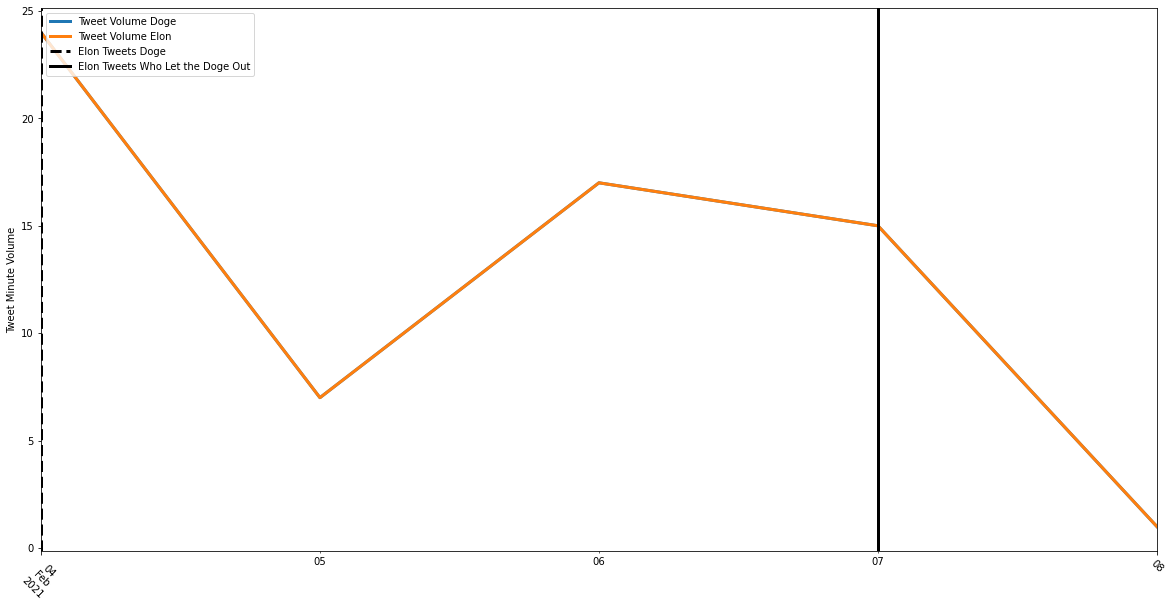

In [145]:
dfet['dateoftweet'] = dfet.time_stamp.apply(lambda x: str(x)[:10])
dfet['dateoftweet'] = pd.to_datetime(dfet.dateoftweet)

minute_volumeelon = dfet.created_at.value_counts()
minute_volumeelon

minute_volumedoge = dfet.created_at.value_counts()
minute_volumedoge

dfet.dateoftweet.value_counts().sort_index().plot(label="Tweet Volume Doge",figsize=(20,10),lw=3)
plt.xticks(rotation=-45)

dfet.dateoftweet.value_counts().sort_index().plot(label="Tweet Volume Elon",figsize=(20,10),lw=3)
plt.xticks(rotation=-45)

plt.axvline("2021-02-04",ls="--",color="black",label="Elon Tweets Doge",lw=3)
plt.axvline("2021-02-07",ls="-",color="black",label="Elon Tweets Who Let the Doge Out",lw=3)

plt.ylabel("Tweet Minute Volume")
plt.legend(loc="upper left")


#### Interpret what you see. I can observe that when Elon tweets 'Doge', that is when tweet volume for doge is at a high point. When he tweets 'who let the doge out', tweet volume is not that high. 

### Top 10 words the day Elon tweeted 'doge'

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
vct = CountVectorizer(stop_words='english')
X = vct.fit_transform(dfet['full_text'])

In [161]:
word_counts = pd.DataFrame(X.sum(axis=0))
word_counts.columns = vct.get_feature_names()
word_counts = word_counts.T
word_counts = word_counts[0].sort_values(ascending=False)

In [100]:
words = word_counts.drop("amp")
words = word_counts.drop("https")

words.head(10)

spacex            10
erdayastronaut    10
amp                8
ajtourville        6
doge               5
josh_bickett       5
time               4
yes                4
engines            3
true               3
Name: 0, dtype: int64

#### The difference between the top 10 words when Elon tweeted 'doge' and the whole data is that there were more words related to space 

# 4. Running Dogecoin tweets through sentiment analysis

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jake\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
sid = SentimentIntensityAnalyzer()
pol_scores = [sid.polarity_scores(x)['compound'] for x in dfdc['text_clean']]
dfdc['sentiment'] = pd.Series(pol_scores)

sent_ts = dfdc.set_index("timestamp").sort_index()

### Top 5 saddest tweets

In [47]:
dfdc.set_index("timestamp").sort_values("sentiment")[['full_text','sentiment']].head()

,full_text,sentiment
timestamp,,
2021-02-06 19:21:46+00:00,@elonmusk fuck yea. Do it. Sick of apples bullshit politics shit. Fuck them up and use that stack of cash the peopl… https://t.co/Tl4paIvqp4,-0.9565
2021-02-05 14:26:23+00:00,"If you sold #dogecoin early, you’re a sellout. Don’t be blaming Elon over your shitty ass, impatient ass decisions.… https://t.co/Bohfo5FQGD",-0.9432
2021-02-05 20:37:15+00:00,think about this. the ppl with most bitcoin are rapists and serial killing serial raping pedophiles. bitcoin ONLY g… https://t.co/Sp5vAd1YNg,-0.9409
2021-02-04 13:23:14+00:00,RT @isupportcoolshi: Yooo everyone blaming Elon for the dogecoin drop is dumb asf it’s the stupid ass people who think 50-100 dollars is wo…,-0.9382
2021-02-05 17:47:42+00:00,my ex girlfriend cheated on me so i pawned her macbook and bought a shit ton of $doge ill see u in hell becca!… https://t.co/vpH0fVfD2t,-0.9360


### Top 5 happiest tweets

In [48]:
dfdc.set_index("timestamp").sort_values("sentiment",ascending=False)[['full_text','sentiment']].head()

,full_text,sentiment
timestamp,,
2021-02-08 01:34:03+00:00,"""But the fruit of the Spirit is love, joy, peace, patience, kindness, goodness, faithfulness, gentleness, and self-… https://t.co/9bFj9AYJNE",0.9857
2021-02-08 01:35:58+00:00,"""But the fruit of the Spirit is love, joy, peace, patience, kindness, goodness, faithfulness, gentleness, and self-… https://t.co/fsjeDAuPzb",0.9857
2021-02-08 01:34:03+00:00,"""But the fruit of the Spirit is love, joy, peace, patience, kindness, goodness, faithfulness, gentleness, and self-… https://t.co/9bFj9AYJNE",0.9857
2021-02-04 21:29:17+00:00,On the bright side atleast my great great great great grandchildren will be taken care of at this pace. \n#Dogecoin #pumpmyballz,0.9735
2021-02-05 04:20:45+00:00,RT @eh1992m: Best #Cryptocurrencies #Dice in the world👌🤑\nyou can easily earn free crypto like \n#Ethereum #DOGE #BTC #LTC\nbig free reward fo…,0.9607


### Graph of sentiment over time with tweet volume

#### Elon tweets 'doge' on 2/4/2021

In [49]:
dfdc['date'] = dfdc.timestamp.apply(lambda x: str(x)[:10])
dfdc['date'] = pd.to_datetime(dfdc.date)

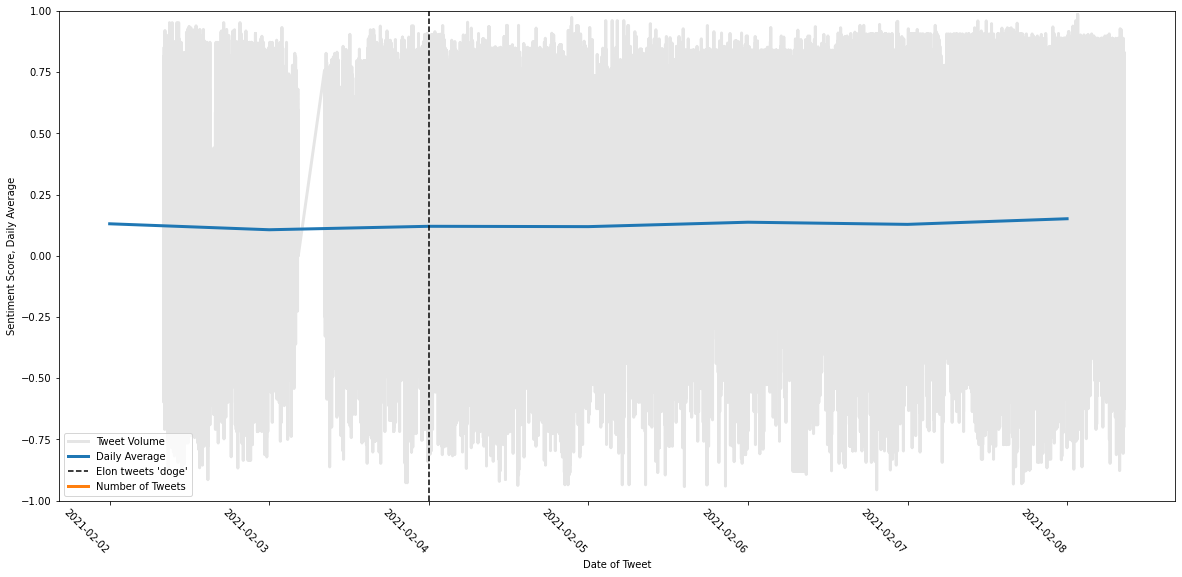

In [50]:
f,a = plt.subplots(figsize = (20,10))
sent_ts['sentiment'].plot(alpha = (.1),ax = a,color = "black",figsize=(20,10),lw=3,label="Tweet Volume")
dfdc.groupby("dateoftweet")['sentiment'].mean().plot(ax = a,label = "Daily Average", lw = 3)

plt.axvline("2021-02-04",color="black",ls="--",label="Elon tweets 'doge'")

dfdc.date.value_counts().sort_index().plot(label="Number of Tweets",figsize=(20,10),lw=3)
plt.xticks(rotation=-45)

plt.ylabel("Sentiment Score, Daily Average")
plt.xlabel("Date of Tweet")

plt.ylim(ymin=-1,ymax=1)

plt.legend()

# 5. Dogecoin prices and tweets

### Reading dogecoin price at 2 minute level and extract the volume, the closing price, and the timestamp

In [140]:
data = pd.read_csv("/Users/Jake/Downloads/doge_coin_by_2min.csv")
dc_price = data[['Volume', 'Close', 'Datetime']]

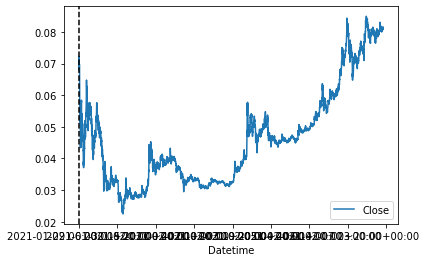

In [146]:
dc_price.plot(x ='Datetime', y='Close', kind = 'line')
plt.axvline("2021-02-04", color="black", ls="--",label = "Elon Tweets 'Doge'")

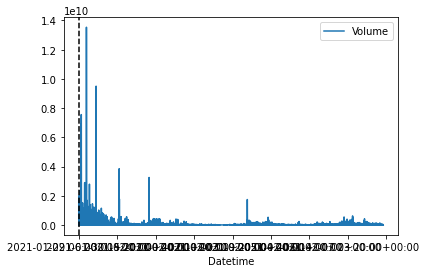

In [147]:
dc_price.plot(x ='Datetime', y='Volume', kind = 'line')
plt.axvline("2021-02-04", color="black", ls="--",label = "Elon Tweets 'Doge'")

#### From the two graphs, one being the closing price and the second being elon's tweets, we see that on the day elon tweets the word 'doge' (dotted line), there is a minimal spike in the closing price, but then sort of flattens out.   

### The Doge Coin closing price versus volume during the sample period.

In [153]:
closing_price = dc_price.set_index("Close").sort_index()

f,a = plt.subplots(figsize = (20,10))
closing_price['close'].plot(alpha = (.75),ax = a,color = "black",figsize = (20,10),lw=3,label="Closing Price")

dc_price.volume.value_counts().sort_index().plot(label="Volume",figsize(20,10),lw=3


dc.date.value_counts().sort_index().plot(label="Number of Tweets",figsize=(20,10),lw=3)
plt.xticks(rotation=-45)

plt.ylabel("Volume, Price($)")
plt.xlabel("Date")

plt.ylim(ymin=-5,ymax=5)

plt.legend(loc="upper left")
dc_price.groupby("dateoftweet")['sentiment'].mean().plot(ax = a,label = "Daily Average",lw=3)
plt.axvline("2021-02-04",color="black",ls="--",label="Elon tweets 'doge'")

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_12928/3899944148.py, line 9)

#### Elon did move the price of doge coin, and it was permanent. The price moved up when he tweeted but then declined for a couple days. However, it ended up rebounding and actually increasing past the price when Elon tweeted. Therefore, his tweets did end up making the doge coin price increase permanent. 

Text(0.5, 1.0, 'My Submission')

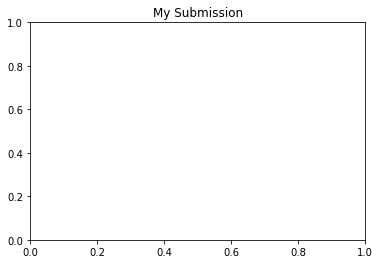

In [148]:
plt.title("My Submission")

### Correlation between the Dog Coin Tweet sentiment and the Doge Coin price

In [160]:
dc_price.loc['sentiment'] = pd.Series(pol_scores)
dc_price.corr().iloc[:-3,-3:] 

C:\Users\Jake\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Volume,Close


#### The data you would need in addition to these data sources is the sentiment of tweets about doge coin through this time frame.

#### In order to read in the data and manipulate it, I would have to make a seperate dataframe of the sentiments of tweets about doge coin and its prices through this time frame. 

#### The analysis necessary for this type of calculation would be the sentiment values of doge coin and its prices. Are people happy and positive that the price is going up? Are they upset that they did not buy in time and the prices are going up? 